In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import ast
from collections import defaultdict
from tqdm import tqdm




In [18]:
# Set the path to the directory containing the subfolders
parent_directory = './runs'

# This list will hold all the numbers found
successes = {}
times = {}
args = {}
# Regular expression to find numbers
number_pattern = re.compile(r'\d+')
all_files = list(os.walk(parent_directory))
for root, dirs, files in tqdm(all_files):
    for file in files:
        if file.endswith(".log"):  # Checks if the file is a log file
            file_path = os.path.join(root, file)
            with open(file_path, 'r') as f:
                lines = f.readlines()
                args[file] = ast.literal_eval(lines[1])
                # print(float(file_path.split("--")[1].split("/")[0].replace("-", ".")))
                time = float(file_path.split("--")[1].split("/")[0].replace("-", "."))
                if(args[file]["adaptive_n"] and time<20240505.17):
                    
                    continue
                
                
                for i, line in enumerate(lines):
                    if line.startswith("Solved:"):
                        
                        successes[file] = int(("True" in lines[i].strip()))

                        if (args[file]["adaptive_n"] and not successes[file]):
                            print(file_path)
                    if(line.startswith("Time:")):
                        times[file] = float(lines[i].strip().replace("Time: ", ""))
           


 49%|████▉     | 1571/3201 [00:02<00:02, 719.71it/s]

./runs/prm-16--20240505-234323/1714967135.4697888/1714967135.4791737.log


100%|██████████| 3201/3201 [00:04<00:00, 679.55it/s]


In [19]:
print(len(times))
print(len(successes))
print(len(args))

plot_points = {}
plot_successes = defaultdict(list)
plot_times = defaultdict(list)
counter = 0
for key in times:
    if(args[key]["adaptive_n"]):
        counter += 1
        print(counter)
    plot_successes[(args[key]["min_samples"], args[key]["max_samples"], args[key]["adaptive_n"])].append(successes[key])
    plot_times[(args[key]["min_samples"], args[key]["max_samples"], args[key]["adaptive_n"])].append(times[key])

1402
1402
1600
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46


46


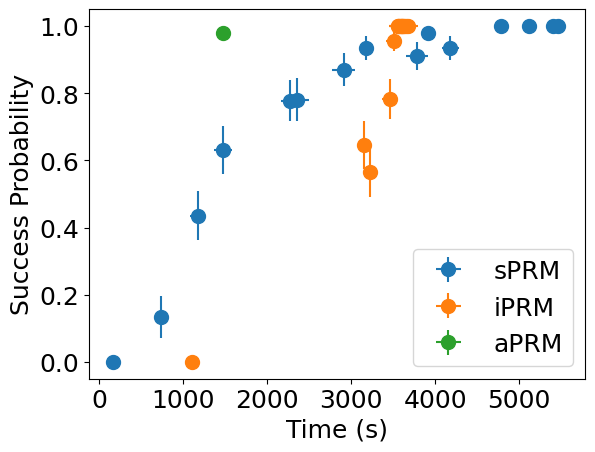

In [22]:

plt.rcParams.update({'font.size': 18})
plt.figure()
legend = ["sPRM", "iPRM", "aPRM"]
# Plot the sPRM results
for condition in legend:
    xs = []
    ys = []
    x_errs = []
    y_errs = []
    ns = []
    for k in plot_successes:
        min_samples, max_samples, adaptive_n = k
        
        if((condition == "iPRM" and (min_samples != max_samples-1 and not adaptive_n)) or
           (condition == "sPRM" and (min_samples == max_samples-1 and not adaptive_n)) or
           (condition == "aPRM" and (adaptive_n))):
            if(condition == "aPRM"):
                print(len(plot_times[k]))
            xs.append(np.mean(plot_times[k]))
            ys.append(np.mean(plot_successes[k]))
            x_errs.append(np.std(plot_times[k])/np.sqrt(len(plot_times[k])))
            y_errs.append(np.std(plot_successes[k])/np.sqrt(len(plot_successes[k])))
            ns.append(max_samples)

    plt.errorbar(xs, ys, xerr=x_errs, yerr=y_errs, markersize=10, fmt='o')

plt.legend(legend, loc="lower right")
plt.ylabel("Success Probability")
plt.xlabel("Time (s)")
plt.savefig('../../../figures/sample_plot.pdf', format='pdf',  bbox_inches='tight')
